# Project 1 Machine Learning

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
from zlib import crc32
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV, RandomizedSearchCV
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import  mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from scipy import stats

## General look at the data

Create a function for automatic uploading of the data

In [2]:
def load_housing_data():
    tarball_path = Path("datasets/hoursing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url="https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing=load_housing_data()

First look at the data and statistics in columns

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Look at data relationships

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

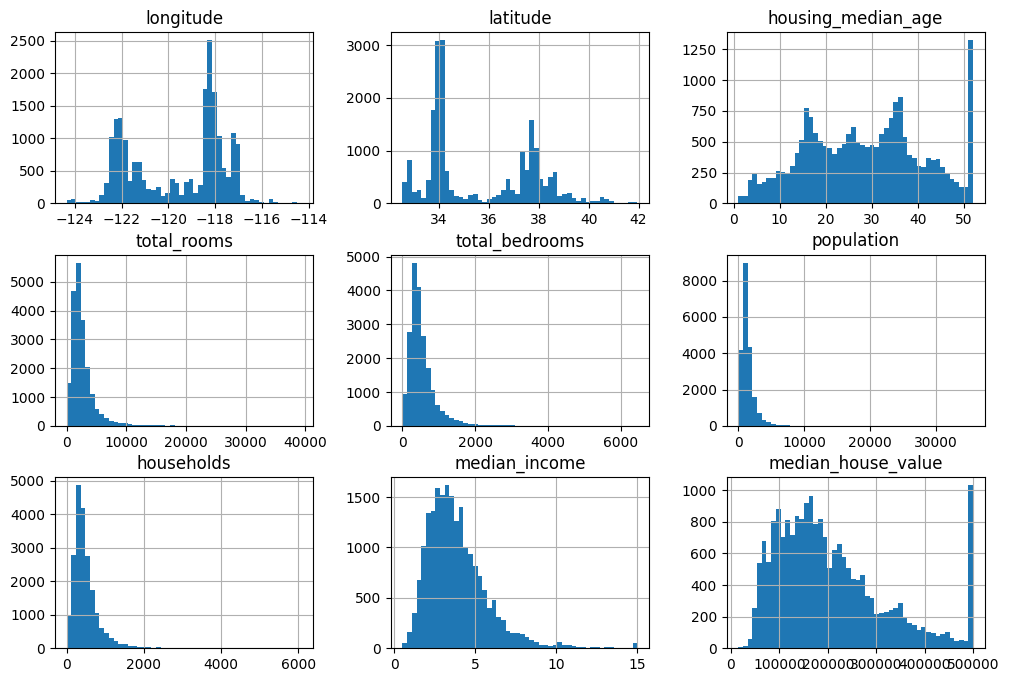

In [7]:
housing.hist(bins=50, figsize=(12,8))

## Start with splitting the data into training and testing sets

#### Create an unstratified train and test split #1

Create a function that takes in the data and the desired ratio, and splits the data randomly into two sets

In [8]:
def shuffle_and_split_data(data, test_ratio):
    shuffeled_indices = np.random.permutation(len(data))
    test_size=int(len(data)*test_ratio)
    test=shuffeled_indices[:test_size]
    train=shuffeled_indices[test_size:]
    return data.iloc[train],data.iloc[test]
#create a function that's not very useful in random selection

In [9]:
train_set,test_set=shuffle_and_split_data(housing,0.2)

In [10]:
len(train_set)

16512

In [11]:
len(test_set)

4128

#### Create an unstratified train and test split #2

Divide data using hashes instead of indexes

In [12]:
def id_test(identity,test_ratio):
    return crc32(np.int64(identity))< test_ratio *2**32

def hash_split(data,id_column,test_ratio):
    ids = data[id_column]
    test_set=ids.apply(lambda x: id_test(x,test_ratio))
    return data.loc[~test_set],data.loc[test_set]

In [13]:
housing_id = housing.reset_index()
train_set, test_set = hash_split(housing_id,"index",0.2)
len(train_set)

16512

In [14]:
len(test_set)

4128

#### Create an unstratified train and test split #3

Create the randomized splits using imported function train_test_split

In [15]:
train_set,test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### Understand the data in more depth

The income has the biggest impact on the value of the house. Creating categorical income will allow the randomized sample to be more representative of the actual data. This step is not necesary if the data and its sample are large enough.  
#### Create an income category so we can use it for stratified splitting

In [16]:
housing["income_cat"]=pd.cut(housing["median_income"],
                             bins=[0.0,1.5,3.0,4.5,6,np.inf],
                             labels=[1,2,3,4,5])

Text(0, 0.5, 'Number of districts')

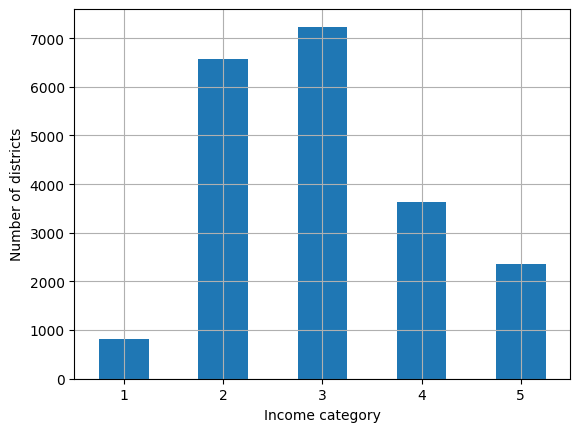

In [17]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")

#### Create a stratified split #1

Use imported funciton that creates specified number of possible combinations of splits. In our case, we will create 10 possible split combinations of the data. Each strain and test split will be in respect to the categorical income ratio.

In [18]:
splitter=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing["income_cat"]):
    strat_train=housing.iloc[train_index]
    strat_test=housing.iloc[test_index]
    strat_splits.append([strat_train,strat_test])

strat_train_set, strat_test_set=strat_splits[0]

#### Create a stratified split #2

Use different imported function (train_test_split) to create a single possible randomized stratified set of train and test sets.
Esnure the ratios by income category are the same on train and test sets

In [19]:
strat_train, strat_test=train_test_split(housing,test_size=0.2,stratify=housing["income_cat"],random_state=42)

In [20]:
strat_train["income_cat"].value_counts() / len(strat_train)

,count
income_cat,
3,0.350594
2,0.318859
4,0.176296
5,0.114462
1,0.039789


In [21]:
strat_test["income_cat"].value_counts() / len(strat_test)

,count
income_cat,
3,0.350533
2,0.318798
4,0.176357
5,0.114341
1,0.039971


In [22]:
for col in (strat_train,strat_test):
    col.drop("income_cat", axis=1, inplace=True)

## Explore and visualize data

Go into more detail on the properties of the data so you can see where the transformations will be needed.
Create a copy of the original training set to protect the original data.

In [23]:
housing_tr=strat_train.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

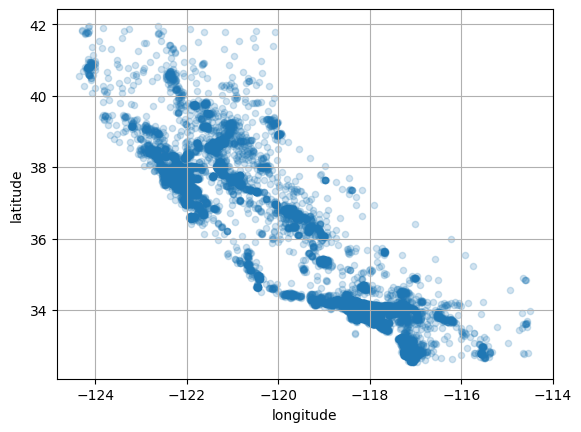

In [24]:
housing_tr.plot(kind="scatter", x="longitude", y="latitude", grid=True , alpha=0.2)

Visualize how the population is centered.

<Axes: xlabel='longitude', ylabel='latitude'>

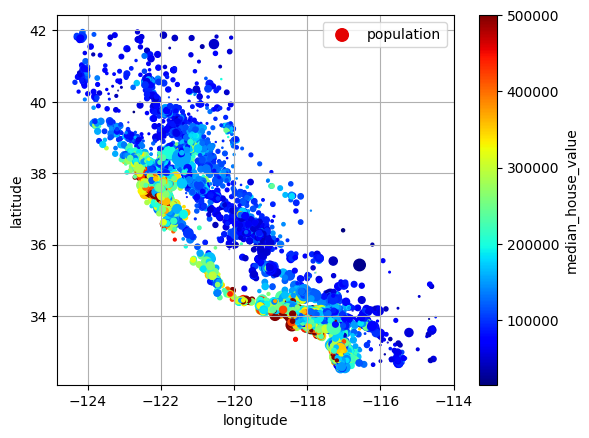

In [25]:
housing_tr.plot(kind="scatter", x="longitude", y="latitude", grid=True , s=housing_tr["population"]/100, label="population",
               c="median_house_value", cmap="jet", colorbar=True, legend=True, sharex=False)

create a correlation matrix to see which data is more correlated to the house value

Understand which data features (columns) have the highest correlation to the value of the house

In [26]:
housing_tr_num=housing_tr.select_dtypes(include=[np.number])

# Include only numeric data types for correlation matrix.
# Without it, an error occurs
corr_matrix = housing_tr_num.corr()

In [27]:
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
longitude,-0.050859
latitude,-0.139584


visualize the correlations

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

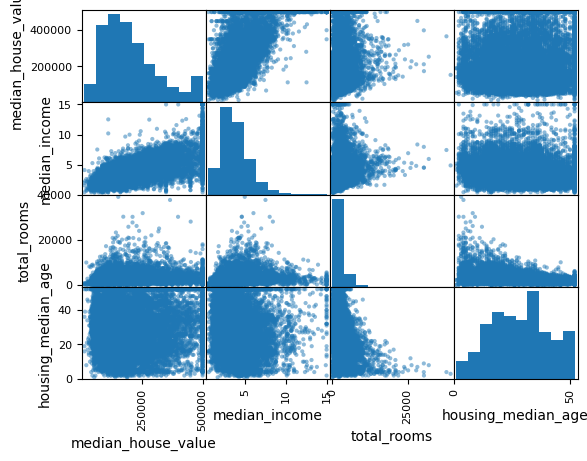

In [28]:
attributes=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing_tr_num[attributes])

look at the biggest correlation contributor

<Axes: xlabel='median_income', ylabel='median_house_value'>

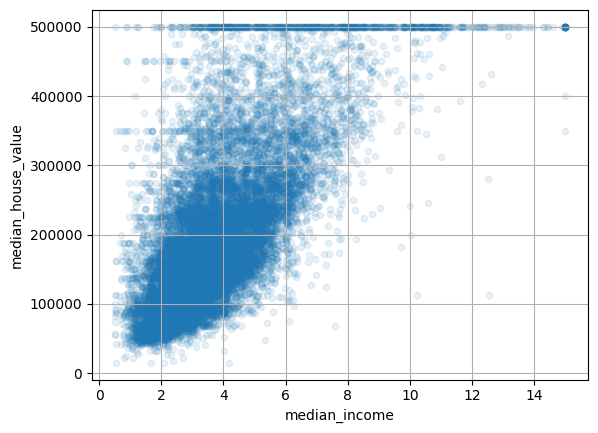

In [29]:
housing_tr.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1, grid=True)

explore other possible correlations

In [30]:
housing_tr_num["rooms_per_house"]=housing_tr_num["total_rooms"]/housing["households"]
housing_tr_num["bedrooms_per_house"]=housing_tr_num["total_bedrooms"]/housing["total_rooms"]
housing_tr_num["people_per_house"]=housing_tr_num["population"]/housing["households"]


In [31]:
corr_matrix=housing_tr_num.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688380
rooms_per_house,0.143663
total_rooms,0.137455
housing_median_age,0.102175
households,0.071426
total_bedrooms,0.054635
population,-0.020153
people_per_house,-0.038224
longitude,-0.050859


## ML preparation

Divide the training set into features and labels. Features are X-values (matrix), Labels are Y-values (vector)

In [32]:
housing_ml = strat_train.drop("median_house_value", axis=1)
housing_ml_labels=strat_train["median_house_value"].copy()
#secure the original value in case transformations fail

The machine learning algorithms don't like
1. any null values
2. categorical data
3. drastically different scales
4. multiple modes
5. heavy skews


start data transformations --- for tutorial skip until final transformation ---

### 1. Fix the nulls

#### fix the nulls #1

Find the median of the column with null and use fillna() function to fill them up.
Not very usefull because it only applies to training set.

In [33]:
med_rooms = housing_ml["total_bedrooms"].median()
housing_ml["total_bedrooms"].fillna(med_rooms,inplace=True)
# not very useful

#### fix the nulls #2

Use SimpleImputer to full null values with median falues. It will apply to training and test sets.
SimpleImputer object can then be applied to transform any other column of choice.

In [34]:
imputer = SimpleImputer(strategy="median")

In [35]:
housing_ml_num=housing_ml.select_dtypes(include=[np.number])

In [36]:
imputer.fit(housing_ml_num)

SimpleImputer(strategy='median')

In [37]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

Use imuter object on entire set

In [38]:
X = imputer.transform(housing_ml_num)

In [39]:
housing_ml_clean = pd.DataFrame(X, columns=housing_ml_num.columns, index=housing_ml_num.index)

### 2. Categorical Data Issue

#### fix the categorical data problem #1

categorical data needs to be transformed into numerical categories to be easily readable by the algorithm.
One way is using OrdinalEncoder function(). The result is a 2D array. The problem: the machine could start relating the data among each other (1,2,3 categories could be represented as 1 being closer to 2 than to 3)

In [40]:
ordinal_encoder = OrdinalEncoder()
housing_cat = housing_ml[["ocean_proximity"]]
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)

In [41]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [42]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

#### fix the categorical data problem #2

another way is suing OneHotEncoder funciton that results in a sparce matrix. The matrix prevents the data to be related to each other in any way.  

In [43]:
hot_encoder=OneHotEncoder()
housing_cat_hot = hot_encoder.fit_transform(housing_cat)

In [44]:
hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 3. Scaling Problem

#### fix the scaling problem #1

create a scale between -1 and 1. Sensitive to outliers because they can affect the scale severly and make the data unusable.

In [45]:
min_max= MinMaxScaler(feature_range=(-1,1))
housing_min_max = min_max.fit_transform(housing_ml_num)

#### fix the scaling problem #2

use a StandardScaler() function. It uses the mean and standard deviation to scale the data, making it more resiliant to outliers

In [46]:
standard_sc = StandardScaler()
housing_standard = standard_sc.fit_transform(housing_ml_num)

### 4. Muplitple Modes

#### fix the bimodal problem #1

Radial Basis Function (rbf) kernel transforms the data ito a form of similrity or how close the data is to each other. It choses a medial value and starts calculation how close/far the rest of the data is to the chosen data point. This create a more gaussian distribution fo the data.

In [47]:
age_35 = rbf_kernel(housing_ml[["housing_median_age"]], [[35]], gamma=0.1)

#### fix bimodial problem #2

create the same type of transformation but using a different function

In [48]:
rbf_transform = FunctionTransformer(rbf_kernel, kw_args=dict(Y=[[35.0]], gamma=0.1))
age_35 = rbf_transform.transform(housing_ml[["housing_median_age"]])

### 5. Heavy Skews

Transform data in its algorithmic form to minimize the heavy skews the data has

In [49]:
log_transformer=FunctionTransformer(np.log, inverse_func=np.exp)
log_pop=log_transformer.transform(housing_ml[["population"]])

### How to reverse the transformation after the algorithm execution

#### reverse the transformations in the output of the function #1

use inverse_transform function. First, do the operations then transform the data.

In [50]:
target_scaler = StandardScaler()
scaled_labels=target_scaler.fit_transform(housing_ml_labels.to_frame())

model=LinearRegression()
model.fit(housing_ml[["median_income"]], scaled_labels)
new_data=housing_ml[["median_income"]].iloc[:5] #simulation

scaled_predictions=model.predict(new_data)
predicions=target_scaler.inverse_transform(scaled_predictions)

#### reverse the transformations in the output of the function #2

Use TransformedTargetRegressor(). As the data is being regressed, the inverse transformation function is being automaticly applied

In [51]:
model=TransformedTargetRegressor(LinearRegression(), transformer=StandardScaler())
model.fit(housing_ml[["median_income"]], housing_ml_labels)
predictions=model.predict(new_data)

### Create a custom transform class

Transformation classes have to include BestEstimator and TransformerMixin classes and their methods fit, transform

In [52]:
class StandardScalerClone(BaseEstimator, TransformerMixin):
    def __init__(self, with_mean=True):
        self.with_mean=with_mean

    def fit(self, X, y=None):
        X = check_array(X)
        self.mean_=X.mean(axis=0)
        self.scale_ = X.stdev(axis=0)
        self.n_features_is = X.shape[1]
        return self

    def transform(self, X):
        check_is_fitted(self)
        X=check_array(X)
        if with_mean:
            X = X - self.mean_
        return X / self.scale_

### create geographical clusters

the geographical location doesn't appear to have too much meaning at this point. However, we can direct the algorithm into the right direction by clustering the geographical location based on the feature.

In [53]:
class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=0.1, random_state=None):
        self.n_clusters=n_clusters
        self.gamma=gamma
        self.random_state=random_state

    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_ = KMeans(n_clusters=self.n_clusters, random_state = self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self,X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_,gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

test the clusters

In [54]:
cluster_simil = ClusterSimilarity(n_clusters=10, gamma =1., random_state =42)
similarities = cluster_simil.fit_transform(housing_ml[["latitude","longitude"]], sample_weight=housing_ml_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [55]:
similarities[:3].round(2)

array([[0.08, 0.  , 0.6 , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.99, 0.  , 0.04, 0.  , 0.  , 0.11, 0.  , 0.63, 0.  ],
       [0.44, 0.  , 0.3 , 0.  , 0.  , 0.7 , 0.  , 0.01, 0.  , 0.29]])

<Axes: xlabel='longitude', ylabel='latitude'>

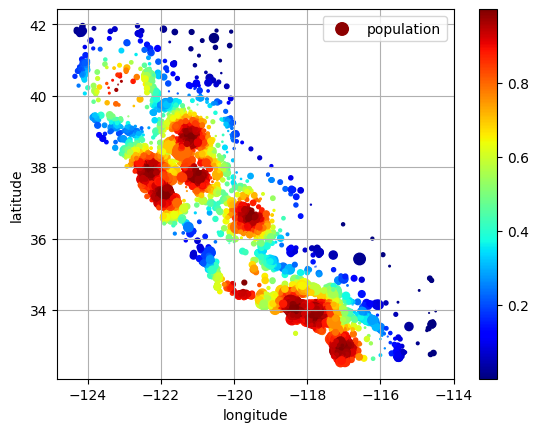

In [56]:
housing_ml.plot(kind="scatter", x="longitude", y="latitude", grid=True , s=housing_tr["population"]/100, label="population",
               c=np.max(similarities, axis=1), cmap="jet", colorbar=True, legend=True, sharex=False)

### Create a transformation pipeline

#### numerical pipelines #1

use the Pipeline class

In [57]:
num_pipeline = Pipeline([("impute", SimpleImputer(strategy="median")),
                         ("stardardize",StandardScaler()),])

#### numerical pipelines #2

use make_pipeline function and omit naming each step in the pipeline

In [58]:
num_pipeline=make_pipeline(SimpleImputer(strategy="median"),StandardScaler())

In [59]:
housing_ml_num_prepared= num_pipeline.fit_transform(housing_ml_num)
housing_ml_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [60]:
housing_ml_num_prepared_df = pd.DataFrame(housing_ml_num_prepared,
                                          columns=num_pipeline.get_feature_names_out(),
                                          index=housing_ml_num.index)

In [61]:
housing_ml_num_prepared_df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365


#### pipeline categorical and numerical values simultaneously #1

specify columns then pipeline

In [62]:
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

In [63]:
cat_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"),
                             OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([("num",num_pipeline, num_attribs),
                                   ("cat",cat_pipeline, cat_attribs)])

#### pipeline categorical and numerical values simultaneously #2

pipeline base on data type

In [64]:
#The original code
#preprocessing = make_column_transformer([(num_pipeline, make_column_selector(dtype_include=np.number)),
#                                         (cat_pipeline, make_column_selector(dtype_include=object))])
# The following is a reformatted version of previous code -Silvia 9/15/24
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object))
)

preprocessing throws an error. I have tried many thign but can't seem to find the problem (Ziva's note 9/12/2024)

In [65]:
housing_ml_prepared = preprocessing.fit_transform(housing_ml)

#### pipeline categorical and numerical values simuntaniusly #3

final transformation - skip all other transformations

Create one long pipeline that will take into consideration all previous issues and push entire dataset through using a single transformation pipeline

In [66]:
def column_ratio(X):
    return X[:,[0]] / X[:,[1]]

def ratio_name(function_transformer, feature_names_id):
    return ["ratio"]

def ratio_pipeline():
    return make_pipeline(SimpleImputer(strategy="median"), FunctionTransformer(column_ratio, feature_names_out=ratio_name),
                         StandardScaler())

log_pipeline = make_pipeline(SimpleImputer(strategy="median"), FunctionTransformer(np.log, feature_names_out="one-to-one"), StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters = 10, gamma =1.0, random_state = 42)

default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

processing = ColumnTransformer([
    ("bedrooms", ratio_pipeline(), ["total_bedrooms","total_rooms"]) ,
    ("rooms_per_house", ratio_pipeline(), ["total_rooms","households"]),
    ("people_per_house", ratio_pipeline(),["population","households"]),
    ("cat", cat_pipeline,  make_column_selector(dtype_include=object)),
    ("log", log_pipeline,["total_bedrooms","total_rooms","population","households","median_income"]),
    ("geo", cluster_simil, ["longitude","latitude"])], remainder = default_num_pipeline)


In [67]:
housing_prepared = processing.fit_transform(housing_ml)
housing_prepared.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(16512, 24)

In [68]:
processing.get_feature_names_out()


array(['bedrooms__ratio', 'rooms_per_house__ratio',
       'people_per_house__ratio', 'cat__ocean_proximity_<1H OCEAN',
       'cat__ocean_proximity_INLAND', 'cat__ocean_proximity_ISLAND',
       'cat__ocean_proximity_NEAR BAY', 'cat__ocean_proximity_NEAR OCEAN',
       'log__total_bedrooms', 'log__total_rooms', 'log__population',
       'log__households', 'log__median_income',
       'geo__Cluster 0 similarity', 'geo__Cluster 1 similarity',
       'geo__Cluster 2 similarity', 'geo__Cluster 3 similarity',
       'geo__Cluster 4 similarity', 'geo__Cluster 5 similarity',
       'geo__Cluster 6 similarity', 'geo__Cluster 7 similarity',
       'geo__Cluster 8 similarity', 'geo__Cluster 9 similarity',
       'remainder__housing_median_age'], dtype=object)

## Select and train the model

training set

#### model #1

Use linear regression model to get the data. Then use error function to see how close the test labeled data is to our features data prediciton

In [69]:
lin_reg = make_pipeline(processing, LinearRegression())
lin_reg.fit(housing_ml, housing_ml_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7d2...
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(gamma=1.0,
                                                                    random_state=42),
                                                  ['longitude', 'latitude'])])),
                ('linearregression', LinearRegression())])

In [70]:
housing_predictions1 = lin_reg.predict(housing_ml)
housing_predictions1[:5].round(2)

array([242761.81, 375862.79, 127480.98,  99355.3 , 324610.74])

In [71]:
housing_ml_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

In [72]:
lin_rmse = mean_squared_error(housing_ml_labels, housing_predictions1, squared=False)

lin_rmse

68647.9568670662

Not very good..

#### model #2

Use a tree decision model

In [73]:
tree_reg = make_pipeline(processing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing_ml, housing_ml_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('bedrooms',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out=<function ratio_name at 0x7d2...
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_bedrooms',
                                                   'total_rooms', 'population',
                                                   'households',
                                                   'median_income']),
                                                 ('geo',
                                                  ClusterSimilarity(gamma=1.0,
                                                                    random_state=42),
                                                  ['longitude', 'latitude'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

check the performance #1

In [74]:
housing_predicitons2 = tree_reg.predict(housing_ml)
tree_rmse = mean_squared_error(housing_ml_labels, housing_predicitons2, squared=False)
tree_rmse

0.0

Appears to be overfitting the data. Use cross validation fuinction to realize the real error comapring to label set

check the performance #2

In [75]:
tree_rmses = -cross_val_score(tree_reg, housing_ml, housing_ml_labels, scoring="neg_root_mean_squared_error", cv=10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [76]:
pd.Series(tree_rmses).describe()

,0
count,10.000000
mean,66572.581753
std,1638.201285
min,64033.419178
25%,65751.279992
50%,66382.968157
75%,67102.680853
max,69896.199628


not very good..

#### model #3

In [77]:
forest_reg=make_pipeline(processing, RandomForestRegressor(random_state=42))

The next cell never executes. Not sure why. It takes a long time to make it. I might try again and leave it for an hour to see if it makes it

*forest_rmses* = -cross_val_score(forest_reg, housing_ml, housing_ml_labels, scoring="neg_root_mean_squared_error", cv=10)

## Fine-tune the model

We want to tune our model by adjusting some parameters and getting a more accurate result

### grid search

Grid intakes and uses FCP (fundamental counting principle) to see which parameter is most optimal. THis means that every parameter is tested in every possible option. The result can be massive especially as the nubmer of parameters increases or the number of possible values for parameters increases.

the following cell takes a long time to execute

In [78]:
full_pipeline = Pipeline([
    ("processing",processing),
    ("random_forest",RandomForestRegressor(random_state=42)),
])

param_grid = [
    {'processing__geo__n_clusters':[5,8,10],
     'random_forest__max_features':[4,6,8]},
    {'processing__geo__n_clusters':[10,15],
     'random_forest__max_features':[6,8,10]},
]

grid_search=GridSearchCV(full_pipeline, param_grid, cv=3, scoring='neg_root_mean_squared_error')
grid_search.fit(housing_ml, housing_ml_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('processing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<func...
                                                                          'median_income']),
                                                                        ('geo',
                                                                         ClusterSimilarity(gamma=1.0,
                                                                                           random_state=42),
                                                                         ['longitude',
                                                                          'latitude'])])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'processing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'processing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [79]:
grid_search.best_params_

{'processing__geo__n_clusters': 15, 'random_forest__max_features': 6}

In [80]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=True, inplace=True)
cv_res.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_processing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,9.189809,0.435264,0.170107,0.001987,5,8,"{'processing__geo__n_clusters': 5, 'random_for...",-47703.714572,-47608.271234,-48545.791888,-47952.592564,421.261150,15
0,5.686150,0.323607,0.172083,0.000632,5,4,"{'processing__geo__n_clusters': 5, 'random_for...",-47607.788946,-47402.087788,-48797.511669,-47935.796134,615.084541,14
1,6.964419,0.411053,0.175484,0.001403,5,6,"{'processing__geo__n_clusters': 5, 'random_for...",-47360.287274,-47389.553481,-48518.695083,-47756.178613,539.312929,13
11,11.681220,0.207541,0.175875,0.001157,10,10,"{'processing__geo__n_clusters': 10, 'random_fo...",-45219.414550,-45364.478256,-46283.851231,-45622.581346,471.323856,12
5,9.472997,0.278277,0.190272,0.021993,8,8,"{'processing__geo__n_clusters': 8, 'random_for...",-45092.594886,-45563.637562,-46206.161254,-45620.797901,456.404785,11


#### randomzed search

Randomized search is defined by the number of iteration the machine has to perform. With each iteratin, the machine randomly selects the parameters and test the result. At the end, the best result of these iteraitons is returned.

this cell takes a long time to execute

In [81]:
param_distrib={'processing__geo__n_clusters': randint(low=3, high=50),
               'random_forest__max_features': randint(low=2, high=20)}
rnd_search = RandomizedSearchCV(full_pipeline, param_distributions=param_distrib, n_iter = 10, cv=3,
                                scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(housing_ml, housing_ml_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('processing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_out...
                                                                                'latitude'])])),
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'processing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d2785302ef0>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7d27853a70d0>},
                   random_state=42, scoring='neg_root_mean_squared_error')

understand which features contributed the most to the model's decisions

In [82]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.07, 0.05, 0.05, 0.  , 0.08, 0.  , 0.  , 0.  , 0.01, 0.01, 0.01,
       0.01, 0.19, 0.01, 0.01, 0.02, 0.04, 0.01, 0.  , 0.02, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.  , 0.  , 0.01, 0.01, 0.01, 0.02, 0.02, 0.01,
       0.01, 0.01, 0.03, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.02,
       0.01, 0.02, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02,
       0.01, 0.01, 0.01, 0.01])

In [83]:
sorted(zip(feature_importances, final_model["processing"].get_feature_names_out()), reverse=True)

[(0.19316939013369588, 'log__median_income'),
 (0.07552821546035697, 'cat__ocean_proximity_INLAND'),
 (0.0721368837515962, 'bedrooms__ratio'),
 (0.050790735613346176, 'people_per_house__ratio'),
 (0.050208062299161235, 'rooms_per_house__ratio'),
 (0.04083416023637713, 'geo__Cluster 3 similarity'),
 (0.026290448423405464, 'geo__Cluster 22 similarity'),
 (0.021556634296293203, 'geo__Cluster 32 similarity'),
 (0.019637668707977986, 'geo__Cluster 6 similarity'),
 (0.019200458331770417, 'geo__Cluster 18 similarity'),
 (0.0187949936352582, 'geo__Cluster 41 similarity'),
 (0.018177875353811112, 'geo__Cluster 17 similarity'),
 (0.018023563778976688, 'geo__Cluster 30 similarity'),
 (0.015437450711432762, 'geo__Cluster 2 similarity'),
 (0.014643030129447893, 'geo__Cluster 7 similarity'),
 (0.012945654669886559, 'geo__Cluster 10 similarity'),
 (0.012160249187021669, 'remainder__housing_median_age'),
 (0.012142148327827755, 'geo__Cluster 38 similarity'),
 (0.012100011584361053, 'geo__Cluster 8 sim

evaluate on test set

In [84]:
x_test = strat_test.drop("median_house_value", axis=1)
y_test = strat_test["median_house_value"].copy()

final_predictions = final_model.predict(x_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse

41585.77427157866

In [85]:
confidence = 0.95
squared_errors = (final_predictions - y_test) **2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc = squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([39417.39628055, 43646.55901667])

## Launch